In [ ]:
!python --version

Python 3.10.12


In [ ]:
import numpy as np
import pandas as pd
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [ ]:
data_url = 'https://github.gatech.edu/raw/asyeda7/ML_Group_13/main/mxmh_survey_results.csv?token=GHSAT0AAAAAAAAC4KXMM5PF7V5GITMMAUCMZRECECQ'
df = pd.read_csv(data_url)

In [ ]:
columns = [
    'Hours per day',
    'While working',
    'Instrumentalist',
    'Composer',
    'Exploratory',
    'Foreign languages',
    'BPM',
    'Frequency [Country]',
    'Frequency [EDM]',
    'Frequency [Folk]',
    'Frequency [Gospel]',
    'Frequency [Hip hop]',
    'Frequency [Jazz]',
    'Frequency [K pop]',
    'Frequency [Latin]',
    'Frequency [Lofi]',
    'Frequency [Metal]',
    'Frequency [Pop]',
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]',
    'Anxiety',
    'Depression',
    'Insomnia',
    'OCD',
    'Music effects']
y_columns = [
    'Anxiety',
    'Depression',
    'Insomnia',
    'OCD']
x_columns = [
    'Hours per day',
    'While working',
    'Instrumentalist',
    'Composer',
    'Exploratory',
    'Foreign languages',
    'BPM',
    'Frequency [Country]',
    'Frequency [EDM]',
    'Frequency [Folk]',
    'Frequency [Gospel]',
    'Frequency [Hip hop]',
    'Frequency [Jazz]',
    'Frequency [K pop]',
    'Frequency [Latin]',
    'Frequency [Lofi]',
    'Frequency [Metal]',
    'Frequency [Pop]',
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]',
    'Music effects']

df1 = df[columns]

In [ ]:
le = LabelEncoder()
obj_columns = df1.select_dtypes(['object']).columns

for c in obj_columns:
  label = le.fit_transform(df1[c])
  df1.drop(c, axis=1, inplace=True)
  df1[c] = label

<ipython-input-6-cc1be27cf430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(c, axis=1, inplace=True)
<ipython-input-6-cc1be27cf430>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[c] = label
<ipython-input-6-cc1be27cf430>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(c, axis=1, inplace=True)
<ipython-input-6-cc1be27cf430>:7: SettingWithCopyWarning: 


In [ ]:
#This cell fixes the odd numerical fitting of Music effects categorical data. It turns the NaN results into 0 and makes Improve = 1, Worsen = -1, No effect = 0
dfm = df1['Music effects'].to_frame()
dfm = dfm.replace(3, 1)
s = dfm.sub(1).mul(-1)
df1.drop('Music effects', axis=1, inplace=True)
df1['Music effects'] = s

In [ ]:
df2 = df1.dropna() #Need to drop nan values existing in BPM
df2 = df2[df2['BPM'] > 20]

y = df2[y_columns].to_numpy()
num_samples = y.shape[0]

train_percent = 0.8
train_index = int(num_samples*train_percent)
y_train = y[:train_index]
y_test = y[train_index:]

num_features = len(x_columns)
X_df = df2[x_columns]
poly = PolynomialFeatures(degree=6, include_bias=False)
X = poly.fit_transform(X_df)
x_train = X[:train_index]
x_test = X[train_index:]

In [ ]:
# visualize preprocessed dataset
df2

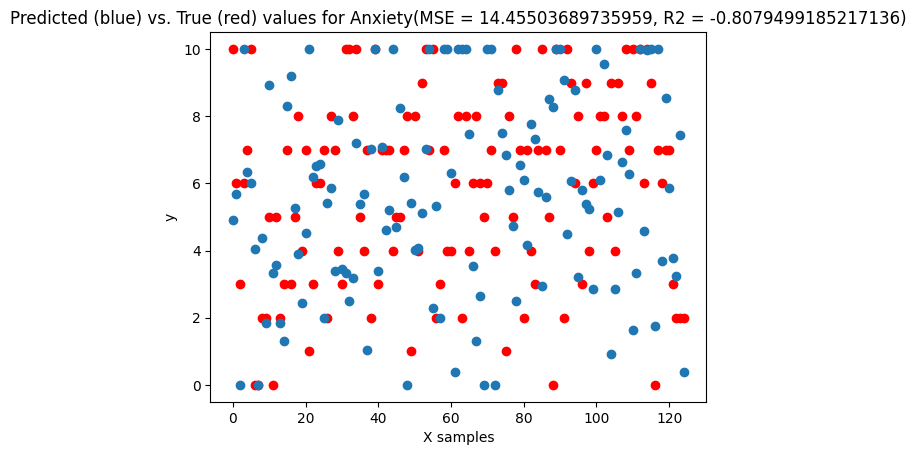

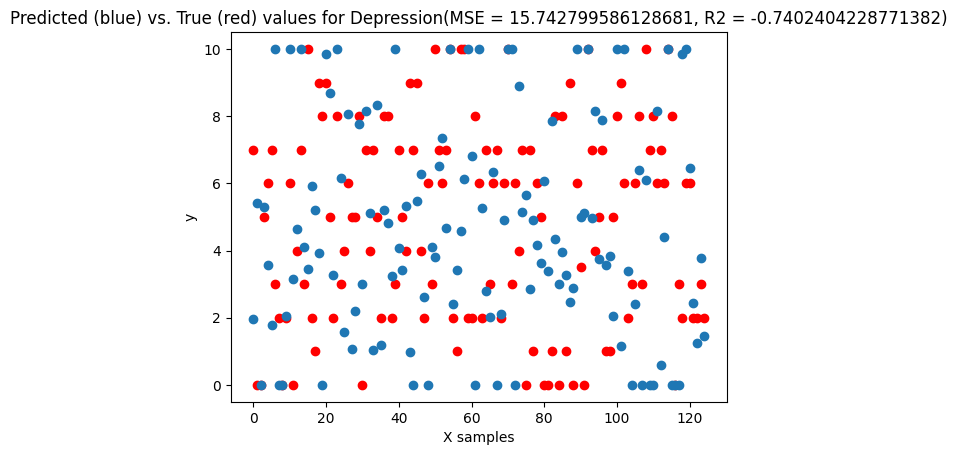

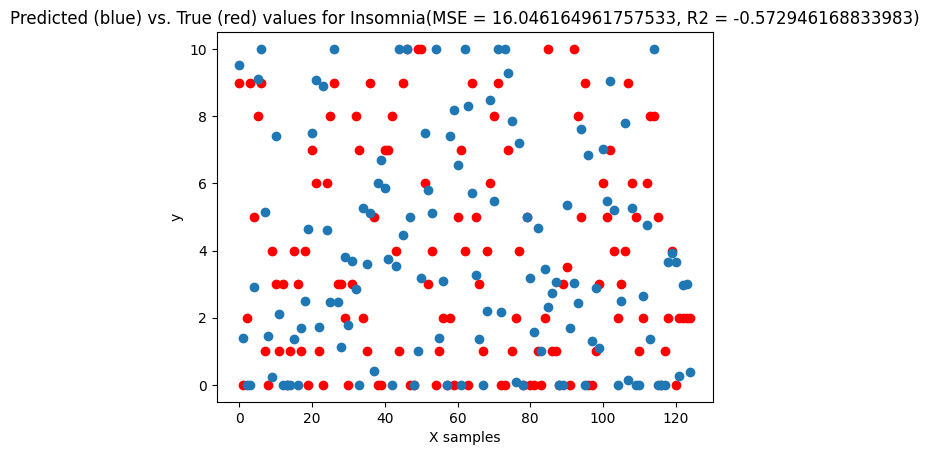

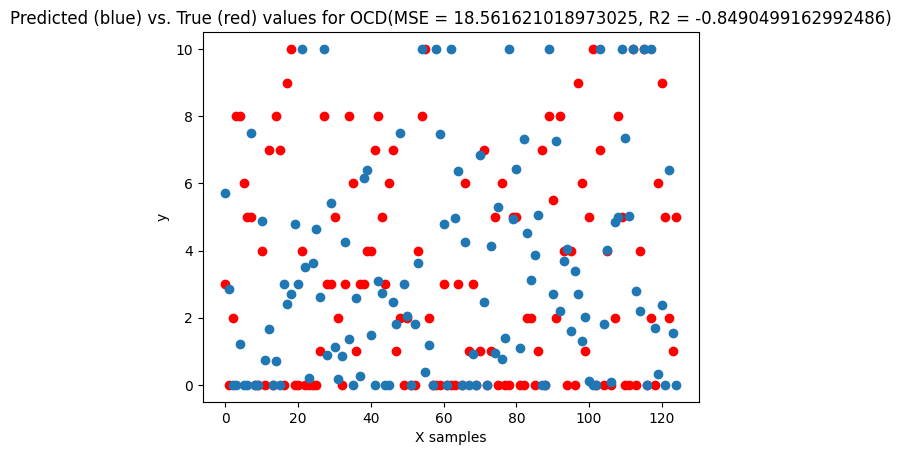

In [ ]:
#Pipeline helps because it hides training data values when making transforming data with preprocessing
#The preprocessing StandardScaler centers and sets standard deviation to 1 so the data resembles a normal distribution
pipe = make_pipeline(StandardScaler(), LinearRegression())

num_targets = len(y_columns)

x_index = np.arange(x_test.shape[0])

for i in range(num_targets):
  pipe.fit(x_train, y_train[:, i])

  pred_vals = pipe.predict(x_test)
  true_vals = y_test[:, i]

  pred_vals[pred_vals > 10] = 10
  pred_vals[pred_vals < 0] = 0

  # normalize pred vals within 0-10 range
  # pred_vals = 10*(pred_vals - min(pred_vals))/(max(pred_vals) - min(pred_vals))

  mse = metrics.mean_squared_error(true_vals, pred_vals)
  r2 = metrics.r2_score(true_vals, pred_vals)
  plt.scatter(x_index, true_vals, color='red')
  plt.scatter(x_index, pred_vals)
  plt.xlabel("X samples")
  plt.ylabel('y')
  plt.title("Predicted (blue) vs. True (red) values for " + y_columns[i] + "(MSE = " + str(mse) + ", R2 = " + str(r2) + ")")
  plt.show()

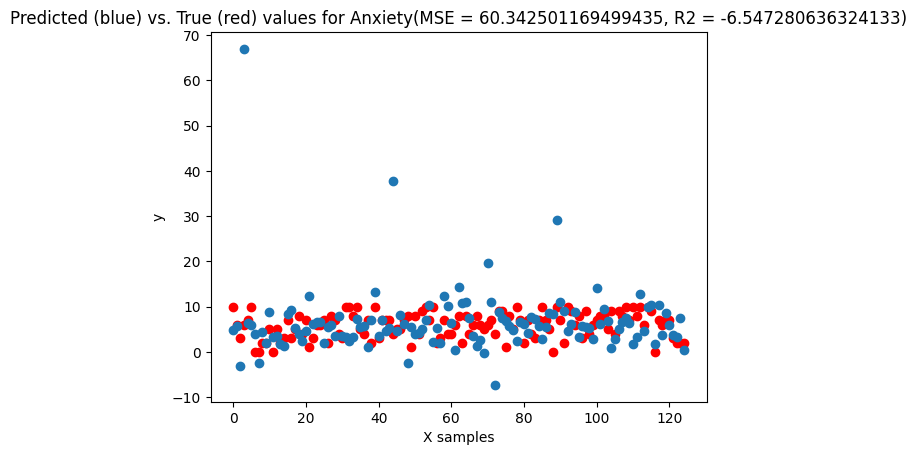

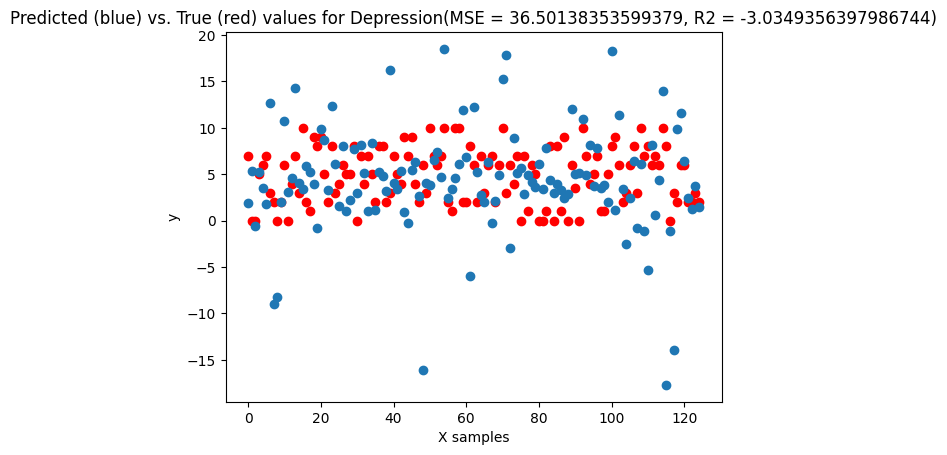

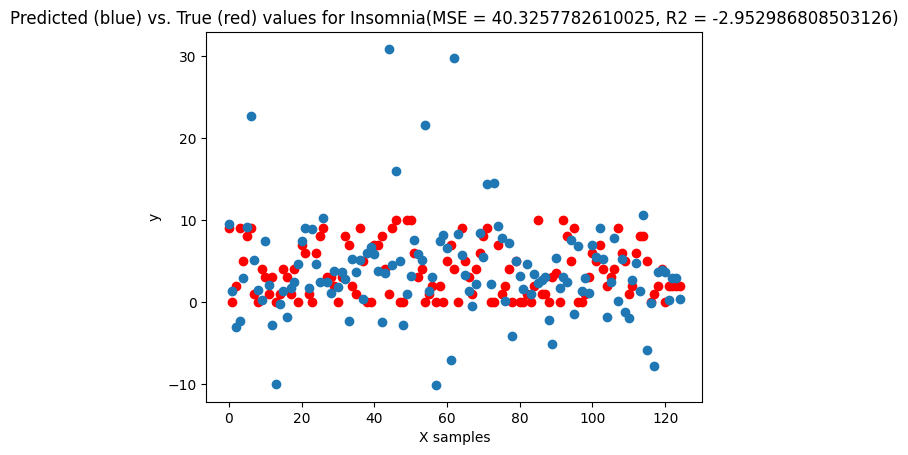

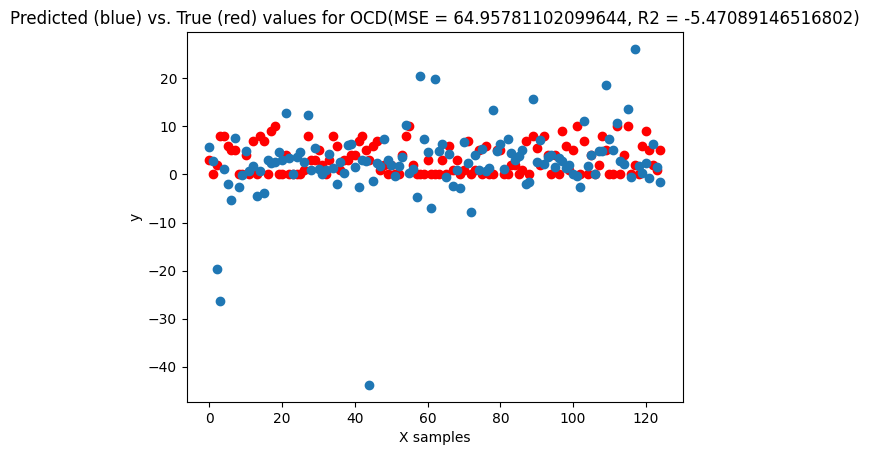

In [ ]:
# without handling outliers

for i in range(num_targets):
  pipe.fit(x_train, y_train[:, i])

  pred_vals = pipe.predict(x_test)
  true_vals = y_test[:, i]

  mse = metrics.mean_squared_error(true_vals, pred_vals)
  r2 = metrics.r2_score(true_vals, pred_vals)
  plt.scatter(x_index, true_vals, color='red')
  plt.scatter(x_index, pred_vals)
  plt.xlabel("X samples")
  plt.ylabel('y')
  plt.title("Predicted (blue) vs. True (red) values for " + y_columns[i] + "(MSE = " + str(mse) + ", R2 = " + str(r2) + ")")
  plt.show()